In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
# Let's read our scrapped data
df = pd.read_csv('flights.csv')
display(df.sample(5, random_state=19))
print("The original dataset has : ", len(df), " rows.")

,Unnamed: 0,country,city,duration,trajectory,departure_time,arrival_time,airport_id,airline,price
371,371,Aruba,Aruba,19h 50m,2 stops,19:00,10:50+1,AUA,https://jtc-fm.meta-cdn.net/cdn-cgi/image/widt...,€958
5618,402,India,Jaipur,20h 45m,2 stops,15:05,17:20+1,JAI,https://jtc-fm.meta-cdn.net/cdn-cgi/image/widt...,€685
6275,53,Italy,Bari,7h 15m,2 stops,10:30,18:45,BRI,https://jtc-fm.meta-cdn.net/cdn-cgi/image/widt...,€339
13361,40,United States,Atlanta,12h 26m,1 stop,16:05,00:31+1,ATL,https://jtc-fm.meta-cdn.net/cdn-cgi/image/widt...,€632
8186,264,Martinique,Fort-de-France,16h 5m,2 stops,08:10,20:15,FDF,https://jtc-fm.meta-cdn.net/cdn-cgi/image/widt...,€889


The original dataset has :  14148  rows.


In [3]:
# Let's check the column names
df.columns

Index(['Unnamed: 0', 'country', 'city', 'duration', 'trajectory',
       'departure_time', 'arrival_time', 'airport_id', 'airline', 'price'],
      dtype='object')

In [4]:
# We'll drop the first column as it's useless
df.drop('Unnamed: 0', axis=1, inplace=True)
df.columns

Index(['country', 'city', 'duration', 'trajectory', 'departure_time',
       'arrival_time', 'airport_id', 'airline', 'price'],
      dtype='object')

In [5]:
# Let's check how many rows have missing data
(df.isnull().sum(axis=1) > 0).sum()
# That's represent 10% of the original data 

1400

<AxesSubplot: >

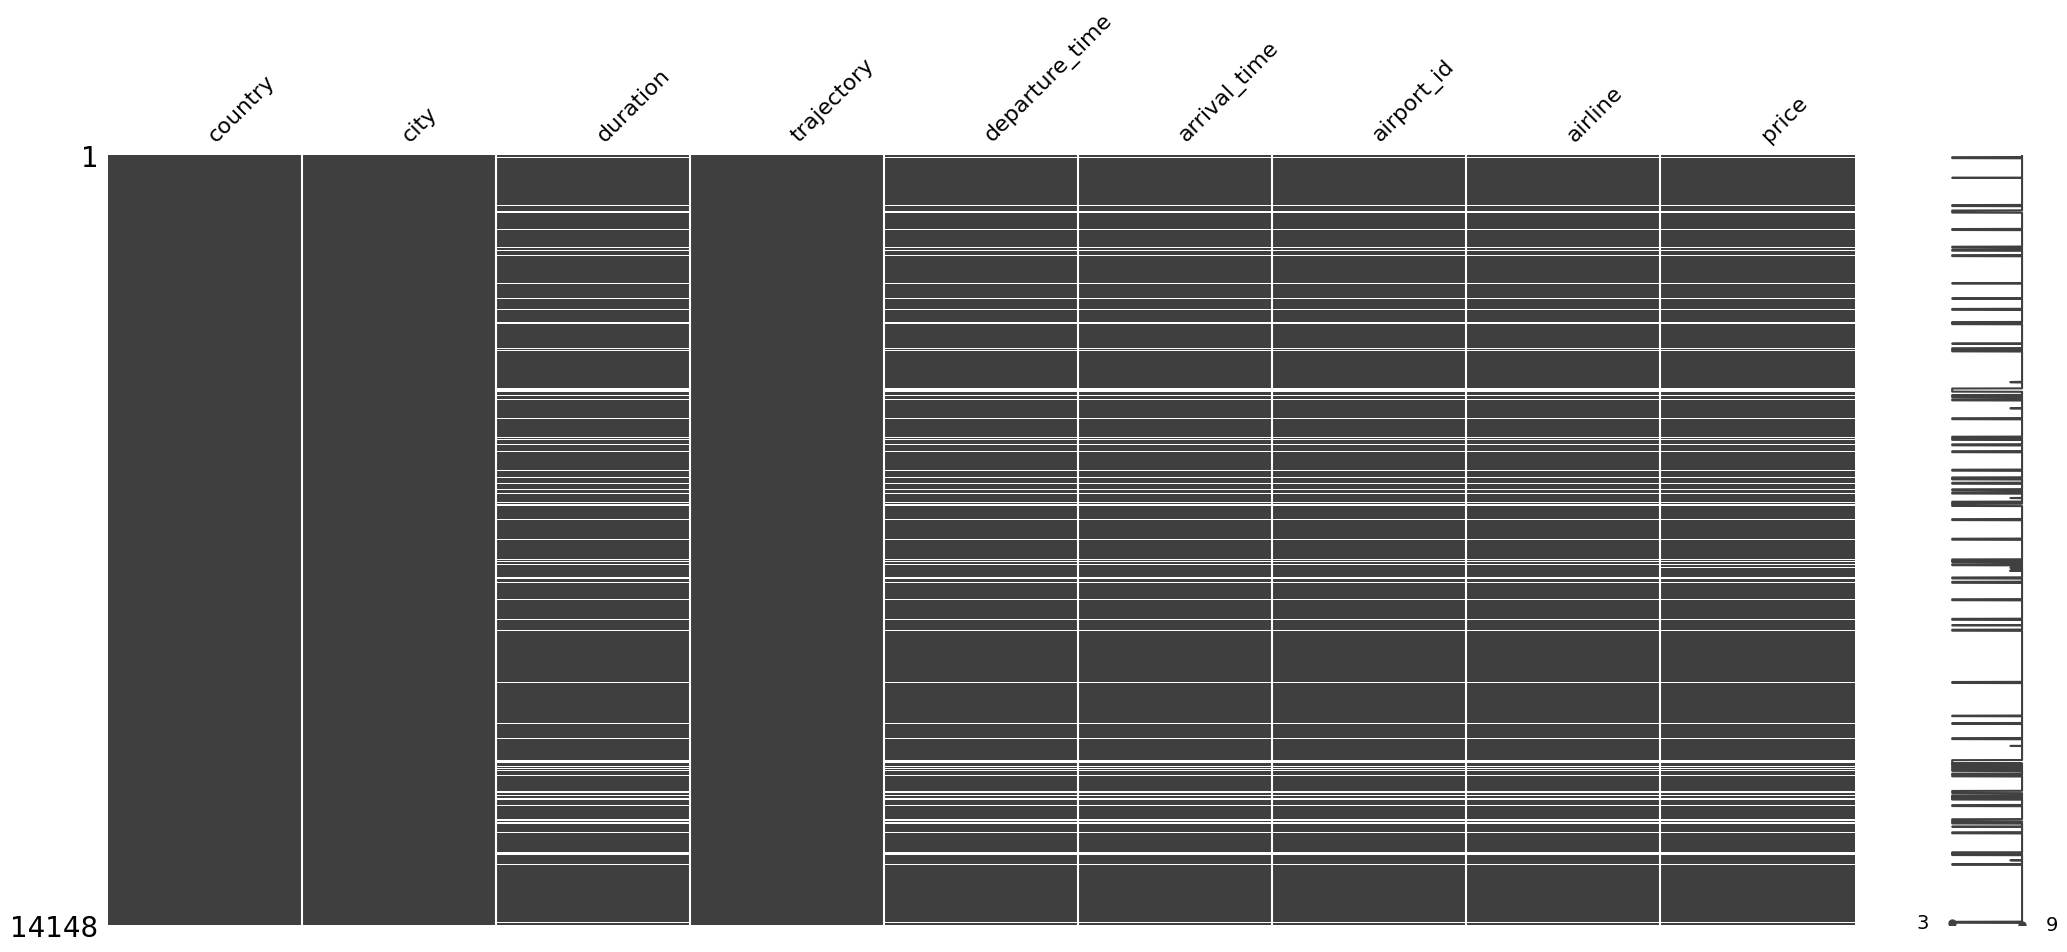

In [6]:
# Let us check the distribution of missing data
msno.matrix(df)
# We can see that those rows have missing values in 6 columns
# It is better to drop those rows as we can't impute them

In [7]:
df.dropna(inplace=True)
print("Now the dataset is reduced to : ", len(df), " rows.")

Now the dataset is reduced to :  12748  rows.


### Country & City

In [8]:
print("We have ", len(df['country'].unique()), " different country.")
df['country'].unique()
# This column is clean

We have  182  different country.


array(['Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Canada', 'Afghanistan', 'Albania',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Cape Verde', 'Caribbean Netherlands',
       'Cayman Islands', 'Chile', 'China', 'Colombia', 'Cook Islands',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Democratic Republic of the Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faroe Islands', 'Fiji', 'Finland', 'French Guyana',
       'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'France',
       'Algeria', 'Slovakia', 'Germany', '

In [9]:
print("We have ", len(df['city'].unique()), " different city.")
df['city'].unique()
# This column is clean

We have  661  different city.


array(['Catumbela', 'Luanda', 'Anguilla', 'Antigua', 'Buenos Aires',
       'Córdoba', 'El Califate', 'Iguazu', 'Mar Del Plata', 'Mendoza',
       'Neuquen', 'Rosario', 'Salta', 'San Carlos de Bariloche',
       'Tucuman', 'Ushuaia', 'Yerevan', 'Aruba', 'Adelaide',
       'Alice Springs', 'Brisbane', 'Cairns', 'Gold Coast',
       'Hamilton Island', 'Hobart', 'Melbourne', 'Perth', 'Sydney',
       'Graz', 'Innsbruck', 'Klagenfurt', 'Linz', 'Salzburg', 'Vienna',
       'Baku', 'Nassau', 'Bahrain', "Cox's Bazar", 'Dhaka', 'Barbados',
       'Antwerp', 'Brussels', 'Belize', 'Cotonou', 'Bermuda',
       'Cochabamba', 'La Paz', 'Santa Cruz', 'Sucre', 'Sarajevo', 'Maun',
       'São Paulo', 'Belem', 'Belo Horizonte', 'Brasília', 'Curitiba',
       'Florianópolis', 'Fortaleza', 'Goiania', 'Joao Pessoa', 'Maceio',
       'Manaus', 'Natal', 'Porto Alegre', 'Rio de Janeiro', 'Salvador',
       'Teresina', 'Montreal', 'Calgary', 'Vancouver', 'Edmonton',
       'Halifax', 'Kelowna', 'Ottawa', 'Que

### Duration

In [10]:
df['duration'].sample(3, random_state=41)
# This column has a string type time format of {xxh xxm}
# Let's convert it to a datetime format that is more practical

12657    17h 30m
6637     12h 40m
2259     33h 55m
Name: duration, dtype: object

In [11]:
df['duration'] = pd.to_timedelta(df['duration'])
df['duration'].sample(3, random_state=41)

12657   0 days 17:30:00
6637    0 days 12:40:00
2259    1 days 09:55:00
Name: duration, dtype: timedelta64[ns]

In [12]:
# This way we can even have a sec representation of the duration column that might be used in our ML model
df['duration_s_'] = df['duration'].dt.total_seconds()
df['duration_s_'].sample(3, random_state=41)

12657     63000.0
6637      45600.0
2259     122100.0
Name: duration_s_, dtype: float64

### trajectory

In [13]:
df['trajectory'].value_counts()
# This column have 5 different categrical values
# we'll rename the column 'stops' and change its value to the number of stops

2 stops    6759
3 stops    2682
1 stop     2637
4 stops     557
Direct      113
Name: trajectory, dtype: int64

In [14]:
df.rename(columns={'trajectory': 'stops'}, inplace=True)
df['stops'] = df['stops'].apply(lambda s : int(s[0]) if s[0].isdigit() else 0)
df['stops'].value_counts()

2    6759
3    2682
1    2637
4     557
0     113
Name: stops, dtype: int64

### departure_time & arrival_time

In [15]:
df[['duration', 'departure_time', 'arrival_time']].sample(3, random_state=19)
# The probem here, beside that the column must be conveterted datatime type
# is that some flights exceed the 24h duration, which add a '+1' (2 or even 3) to the arrival time
# meaning that its the time of the next n day

,duration,departure_time,arrival_time
4695,0 days 09:05:00,11:30,21:35
13774,1 days 19:35:00,02:25,12:00+1
3771,0 days 09:55:00,12:40,00:35+1


In [16]:
# We'll fix that by adding a reference date (The day on which the data is scraped from)
def parse_time(time):
    
    parts = time.split(':')
    hours = int(parts[0])
    minutes = int(parts[1].split('+')[0])
    extra_day = int(parts[1].split('+')[1]) if '+' in time else 0

    reference_date = pd.to_datetime('15/03/2024', dayfirst=True) + pd.Timedelta(days=extra_day)

    # Combine the reference date with the time components
    datetime_obj = reference_date.replace(hour=hours, minute=minutes)

    return datetime_obj

# Convert departure and arrival time columns to datetime without date
df['departure_time'] = df['departure_time'].apply(parse_time)
df['arrival_time'] = df['arrival_time'].apply(parse_time)

df[['duration', 'departure_time', 'arrival_time']].sample(3, random_state=19)

,duration,departure_time,arrival_time
4695,0 days 09:05:00,2024-03-15 11:30:00,2024-03-15 21:35:00
13774,1 days 19:35:00,2024-03-15 02:25:00,2024-03-16 12:00:00
3771,0 days 09:55:00,2024-03-15 12:40:00,2024-03-16 00:35:00


In [17]:
# We can add a categorical column exploiting the departure_time column
# by spliting time by : Night(12am to 6am), Morning(6am to 12pm), Afternoon(12pm to 19pm) and Evening(19pm to 12am)

time_ranges = [(0, 6), (6, 12), (12, 19), (19, 24)]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

departure_tod = df['departure_time'].dt.hour
arrival_tod = df['arrival_time'].dt.hour

def categorize_hour(hour):
    for i, (start, end) in enumerate(time_ranges):
        if start <= hour < end:
            return labels[i]

df['departure_tod'] = departure_tod.apply(categorize_hour)
df['arrival_tod'] = arrival_tod.apply(categorize_hour)
df.head(3)


,country,city,duration,stops,departure_time,arrival_time,airport_id,airline,price,duration_s_,departure_tod,arrival_tod
0,Angola,Catumbela,0 days 19:40:00,1,2024-03-15 22:05:00,2024-03-16 18:45:00,CBT,https://jtc-fm.meta-cdn.net/cdn-cgi/image/widt...,€861,70800.0,Evening,Afternoon
1,Angola,Catumbela,1 days 01:10:00,2,2024-03-15 16:35:00,2024-03-16 18:45:00,CBT,https://jtc-fm.meta-cdn.net/cdn-cgi/image/widt...,€744,90600.0,Afternoon,Afternoon
2,Angola,Catumbela,1 days 06:15:00,2,2024-03-15 11:30:00,2024-03-16 18:45:00,CBT,https://jtc-fm.meta-cdn.net/cdn-cgi/image/widt...,€723,108900.0,Morning,Afternoon


### airport_id

In [18]:
print("We have ", len(df['airport_id'].unique()), " different airport.")
# obviously more than the number of cities (661) as some contains more than one
df['airport_id'].unique()
# This column is clean

We have  693  different airport.


array(['CBT', 'LAD', 'AXA', 'ANU', 'EZE', 'AEP', 'COR', 'FTE', 'IGR',
       'MDQ', 'MDZ', 'NQN', 'ROS', 'SLA', 'BRC', 'TUC', 'USH', 'EVN',
       'AUA', 'ADL', 'ASP', 'BNE', 'CNS', 'OOL', 'HTI', 'HBA', 'MEL',
       'PER', 'SYD', 'GRZ', 'INN', 'KLU', 'LNZ', 'SZG', 'VIE', 'GYD',
       'NAS', 'BAH', 'CXB', 'DAC', 'BGI', 'ANR', 'BRU', 'CRL', 'BZE',
       'COO', 'BDA', 'CBB', 'LPB', 'VVI', 'SRE', 'SJJ', 'MUB', 'GRU',
       'VCP', 'CGH', 'BEL', 'CNF', 'BSB', 'CWB', 'FLN', 'FOR', 'GYN',
       'JPA', 'MCZ', 'MAO', 'NAT', 'POA', 'GIG', 'SDU', 'SSA', 'THE',
       'YUL', 'YYC', 'YVR', 'YEG', 'YHZ', 'YLW', 'YOW', 'YQB', 'YYT',
       'YQT', 'YTZ', 'YYZ', 'YWG', 'KBL', 'TIA', 'BWN', 'SOF', 'VAR',
       'OUA', 'BJM', 'DLA', 'BVC', 'RAI', 'SID', 'VXE', 'BON', 'GCM',
       'ANF', 'ARI', 'CCP', 'CPO', 'IPC', 'IQQ', 'LSC', 'PMC', 'PUQ',
       'SCL', 'PEK', 'PKX', 'TFU', 'CTU', 'CKG', 'CAN', 'KWL', 'HGH',
       'JZH', 'KMG', 'LXA', 'LJG', 'PVG', 'SHA', 'SZX', 'BAQ', 'BOG',
       'BGA', 'CLO',

### airline

In [19]:
print("We have ", len(df['airline'].unique()), " different airline.")

df['airline'].unique()
# They are represented with a link referencing to the logo of the airline
# It was difficult to extract the airline directly as it was hidden by JavaScript code, leading to a lot of missing data
# the idea here is to manually associate to each link its airline name (32 isn't a bad number tho)

We have  32  different airline.


array(['https://jtc-fm.meta-cdn.net/cdn-cgi/image/width=64,height=64,fit=crop,gravity=auto/upload/auto/carriers/icons/original/62.png',
       'https://jtc-fm.meta-cdn.net/cdn-cgi/image/width=64,height=64,fit=crop,gravity=auto/upload/auto/carriers/icons/original/17.png',
       'https://jtc-fm.meta-cdn.net/cdn-cgi/image/width=64,height=64,fit=crop,gravity=auto/upload/auto/carriers/icons/original/192.png',
       'https://jtc-fm.meta-cdn.net/cdn-cgi/image/width=64,height=64,fit=crop,gravity=auto/upload/auto/carriers/icons/original/5015.png',
       'https://jtc-fm.meta-cdn.net/cdn-cgi/image/width=64,height=64,fit=crop,gravity=auto/upload/auto/carriers/icons/original/112.png',
       'https://jtc-fm.meta-cdn.net/cdn-cgi/image/width=64,height=64,fit=crop,gravity=auto/upload/auto/carriers/icons/original/22.png',
       'https://jtc-fm.meta-cdn.net/cdn-cgi/image/width=64,height=64,fit=crop,gravity=auto/upload/auto/carriers/icons/original/197.png',
       'https://jtc-fm.meta-cdn.net/cdn-cgi

In [20]:
airline_map = {
    '62': "Royal Air Maroc",
    '17': "TAP Air Portugal",
    '192': "TUI fly Belgium",
    '5015': "ITA Airways",
    '112': "Tunisair Express",
    '22': "Lufthansa",
    '197': "Pegasus Airlines",
    '2777': "Transavia",
    '142': "Fly Emirates",
    '27': "American Airlines",
    '42': "Iberia",
    '172': "Air Canada",
    '7': "Air France",
    '222' : "Qatar Airways",
    '47': "Turkish Airlines",
    '372': "Egyptair",
    '572': "Malaysia Airlines",
    '277': "Etihad Airways",
    '67': "KLM",
    '517': "IndiGo",
    '57': "United Airlines",
    '4583': "Air Senegal",
    '932': "Mauritania Airlines",
    '387': "Qantas Airways",
    '3827': "Air Cairo",
    '1517': "Sichuan Airlines",
    '802': "Azores Airlines",
    '187': "Air Arabia",
    '32': "Vueling",
    '447': "Oman Air",
    '87': "British Airways",
    '102': "Delta Air Lines"
}

In [21]:
df['airline'] = df['airline'].apply(lambda link : airline_map[link[119:][:-4]])
df['airline'].value_counts()
# We can see that some airlines are occuring few times, let's group them into one category (others)

Royal Air Maroc        4309
Lufthansa              1991
TAP Air Portugal        893
Air France              839
Air Canada              681
Qatar Airways           578
Iberia                  555
Pegasus Airlines        502
Fly Emirates            334
Turkish Airlines        315
Etihad Airways          303
Tunisair Express        242
Transavia               213
ITA Airways             205
Egyptair                170
Air Arabia              144
KLM                     113
United Airlines         101
TUI fly Belgium          80
Vueling                  45
American Airlines        41
Azores Airlines          27
Air Senegal              23
Qantas Airways           11
Mauritania Airlines      10
British Airways           7
Malaysia Airlines         6
Sichuan Airlines          6
Air Cairo                 1
Oman Air                  1
IndiGo                    1
Delta Air Lines           1
Name: airline, dtype: int64

In [22]:
airline_counts = df['airline'].value_counts()
rare_airlines = airline_counts[airline_counts < 40].index.tolist()
df['airline'] = df['airline'].apply(lambda x: 'Others' if x in rare_airlines else x)

df['airline'].value_counts()
# Now it's way better !

Royal Air Maroc      4309
Lufthansa            1991
TAP Air Portugal      893
Air France            839
Air Canada            681
Qatar Airways         578
Iberia                555
Pegasus Airlines      502
Fly Emirates          334
Turkish Airlines      315
Etihad Airways        303
Tunisair Express      242
Transavia             213
ITA Airways           205
Egyptair              170
Air Arabia            144
KLM                   113
United Airlines       101
Others                 94
TUI fly Belgium        80
Vueling                45
American Airlines      41
Name: airline, dtype: int64

### price

In [23]:
df['price'].sample(3, random_state=10)
# As we can see the prices are in a string format
# let's remove the '€' sign and convert the column into float

473      €1,505
13121      €713
10460      €255
Name: price, dtype: object

In [24]:
df['price'] = df['price'].apply(lambda p : float(p[1:].replace(',','')))
df['price'].sample(3, random_state=10)

473      1505.0
13121     713.0
10460     255.0
Name: price, dtype: float64

### Finally

In [25]:
df.sample(10)

,country,city,duration,stops,departure_time,arrival_time,airport_id,airline,price,duration_s_,departure_tod,arrival_tod
12599,United Kingdom,Leeds,0 days 10:40:00,2,2024-03-15 11:30:00,2024-03-15 22:10:00,LBA,TAP Air Portugal,412.0,38400.0,Morning,Evening
9918,Portugal,Porto Santo,1 days 02:20:00,3,2024-03-15 16:35:00,2024-03-16 18:55:00,PXO,Royal Air Maroc,315.0,94800.0,Afternoon,Afternoon
5249,Guam,Guam,1 days 14:15:00,2,2024-03-15 14:00:00,2024-03-17 14:15:00,GUM,Qatar Airways,1618.0,137700.0,Afternoon,Afternoon
4878,Germany,Nuremberg,0 days 13:40:00,1,2024-03-15 19:15:00,2024-03-16 09:55:00,NUE,Air France,121.0,49200.0,Evening,Morning
2057,Chile,Concepcion,1 days 10:18:00,4,2024-03-15 11:30:00,2024-03-16 18:48:00,CCP,TAP Air Portugal,770.0,123480.0,Morning,Afternoon
8508,Mexico,Tijuana,1 days 05:30:00,4,2024-03-15 02:35:00,2024-03-16 01:05:00,TIJ,Tunisair Express,797.0,106200.0,Night,Night
642,Austria,Linz,0 days 19:20:00,1,2024-03-15 02:25:00,2024-03-15 22:45:00,LNZ,Lufthansa,211.0,69600.0,Night,Evening
11204,Switzerland,Basel / Mulhouse,0 days 08:10:00,1,2024-03-15 13:35:00,2024-03-15 22:45:00,BSL,Royal Air Maroc,238.0,29400.0,Afternoon,Evening
7656,Morocco,Oujda,1 days 04:15:00,3,2024-03-15 19:00:00,2024-03-16 23:15:00,OUD,Royal Air Maroc,642.0,101700.0,Evening,Evening
2922,Cyprus,Paphos,1 days 01:10:00,2,2024-03-15 16:05:00,2024-03-16 19:15:00,PFO,Iberia,618.0,90600.0,Afternoon,Evening


In [26]:
df.to_csv("clean_flights.csv", index=False)